In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull


In [2]:
electrons = np.array([[0.0315232 , 0.29052289],
       [0.7632725 , 0.87287885],
       [0.17021246, 0.78322471],
       [0.9208504 , 0.5061037 ],
       [0.83778378, 0.09455847],
       [0.31924925, 0.0452944 ]])

ion = np.array([0.5, 0.5])


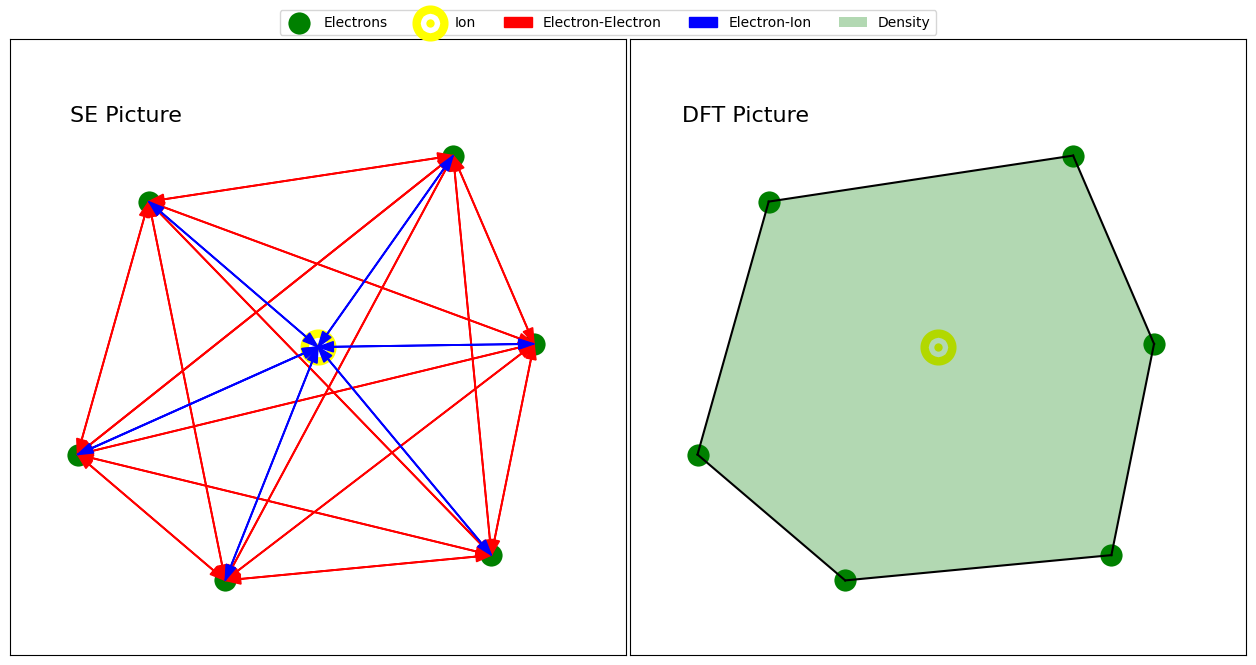

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.0)
axs[0].scatter(electrons[:, 0], electrons[:, 1], color='green', label='Electrons', lw = 10)
axs[0].scatter(ion[0], ion[1], color='yellow', label='Ion', lw = 20)

for i in range(len(electrons)):
    for j in range(i + 1, len(electrons)):
        if i ==0 and j == 1:
                    axs[0].arrow(electrons[i, 0], electrons[i, 1], 
                              electrons[j, 0] - electrons[i, 0], 
                              electrons[j, 1] - electrons[i, 1], 
                              color='red', head_width=0.02, 
                              length_includes_head=True,
                              label='Electron-Electron')
        axs[0].arrow(electrons[i, 0], electrons[i, 1], electrons[j, 0] - electrons[i, 0], electrons[j, 1] - electrons[i, 1], color='red', head_width=0.02, length_includes_head=True)
        axs[0].arrow(electrons[j, 0], electrons[j, 1], electrons[i, 0] - electrons[j, 0], electrons[i, 1] - electrons[j, 1], color='red', head_width=0.02, length_includes_head=True)

for i,point in enumerate(electrons):
    if i == 0:
        axs[0].arrow(point[0], point[1], ion[0] - point[0], ion[1] - point[1], color='blue', head_width=0.02, length_includes_head=True, label='Electron-Ion')
    axs[0].arrow(point[0], point[1], ion[0] - point[0], ion[1] - point[1], color='blue', head_width=0.02, length_includes_head=True)
    axs[0].arrow(ion[0], ion[1], point[0] - ion[0], point[1] - ion[1], color='blue', head_width=0.02, length_includes_head=True)

axs[0].text(0.125, 0.95, 'SE Picture', fontsize=16, ha='center', va='center')
axs[1].text(0.125, 0.95, 'DFT Picture', fontsize=16, ha='center', va='center')
hull = ConvexHull(electrons)

# Plot the points and the convex hull
axs[1].scatter(electrons[:, 0], electrons[:, 1], color='green', lw=10)
axs[1].scatter(ion[0], ion[1], color='yellow', lw=20)

# Plot the convex hull
for simplex in hull.simplices:
    axs[1].plot(electrons[simplex, 0], electrons[simplex, 1], 'k-')

# Fill the convex hull with green color
axs[1].fill(electrons[hull.vertices, 0], electrons[hull.vertices, 1], 'green', alpha=0.3, label = 'Density')

for ax in axs:
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig.legend(ncol=5, bbox_to_anchor=(0.5, 0.925), loc='upper center')
plt.show()